# M3 - Machine Learning
The Assignment
The implementation of a ML model to predict a person’s probability of having heart disease.
Your work must include all stages of the ML Checklist (data understanding, data preparation,
modelling and evaluation) in a notebook format. Your code is expected to be properly organized
and commented to facilitate understanding, and it needs to run without errors. Different
algorithms can be optionally explored as well.

Entrega: 25/02

In [1]:
import numpy as np # linear algebra
import pandas as pd # Series and DataFrames

# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [3]:
from sklearn import __version__ as sklearn_version
print('Installed version for scikit-learn: {}.'.format(sklearn_version))

Installed version for scikit-learn: 1.0.2.


In [4]:
# Colab Drive

#from google.colab import drive
#drive.mount('/content/drive')

#df = pd.read_csv('/content/drive/MyDrive/dados/heart_disease_data.csv')

In [5]:

df = pd.read_csv('heart_disease_data.csv')


# Data Understanding

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   HeartDisease                319795 non-null  object 
 1   BMI                         319795 non-null  float64
 2   Smoking                     319795 non-null  object 
 3   AlcoholDrinking             212984 non-null  object 
 4   Stroke                      318683 non-null  object 
 5   PhysicalHealth              319795 non-null  float64
 6   MentalHealth                319795 non-null  float64
 7   DiffWalking                 319795 non-null  object 
 8   Sex                         319795 non-null  object 
 9   AgeCategory                 319795 non-null  object 
 10  Race                        319795 non-null  object 
 11  Diabetic                    319795 non-null  object 
 12  PhysicalActivity            319795 non-null  object 
 13  GenHealth     

In [7]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Columns: 20 entries, HeartDisease to State
dtypes: float64(4), object(16)
memory usage: 48.8+ MB


In [8]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer', 'HeartDisease_FamilyHistory',
       'State'],
      dtype='object')

In [9]:
df.head(1)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease_FamilyHistory,State
0,No,16.60,Yes,No,No,3.00,30.00,No,Female,55-59,White,Yes,Yes,Very good,5.00,Yes,No,Yes,No,MT


In [10]:
df.head(4).T

,0,1,2,3
HeartDisease,No,No,No,No
BMI,16.60,20.34,26.58,24.21
Smoking,Yes,No,Yes,No
AlcoholDrinking,No,NaN,NaN,NaN
Stroke,No,Yes,No,No
PhysicalHealth,3.00,0.00,20.00,0.00
MentalHealth,30.00,0.00,30.00,0.00
DiffWalking,No,No,No,No
Sex,Female,Female,Male,Female
AgeCategory,55-59,80 or older,65-69,75-79


In [11]:
print("Total number of rows in the dataframe: ",df.shape[0])

Total number of rows in the dataframe:  319795


In [12]:
df.dtypes

HeartDisease                   object
BMI                           float64
Smoking                        object
AlcoholDrinking                object
Stroke                         object
PhysicalHealth                float64
MentalHealth                  float64
DiffWalking                    object
Sex                            object
AgeCategory                    object
Race                           object
Diabetic                       object
PhysicalActivity               object
GenHealth                      object
SleepTime                     float64
Asthma                         object
KidneyDisease                  object
SkinCancer                     object
HeartDisease_FamilyHistory     object
State                          object
dtype: object

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,"319,795.00",28.33,6.37,12.02,24.03,27.34,31.44,119.00
PhysicalHealth,"319,795.00",3.37,7.95,0.00,0.00,0.00,2.00,30.00
MentalHealth,"319,795.00",3.90,7.96,0.00,0.00,0.00,3.00,30.00
SleepTime,"319,795.00",7.10,1.44,1.00,6.00,7.00,8.00,24.00


In [14]:
df.describe(include=['object']).T
## Alternative
# df.describe(exclude = np.number).T

,count,unique,top,freq
HeartDisease,319795,2,No,292422
Smoking,319795,2,No,187887
AlcoholDrinking,212984,2,No,191207
Stroke,318683,2,No,306614
DiffWalking,319795,2,No,275385
Sex,319795,2,Female,167805
AgeCategory,319795,14,65-69,34143
Race,319795,6,White,245212
Diabetic,319795,4,No,269653
PhysicalActivity,319795,2,Yes,247957


In [15]:
df['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [16]:
print('This is a DataFrame')
print(type(df[['HeartDisease']]))
df[['HeartDisease']].head(7)

This is a DataFrame
<class 'pandas.core.frame.DataFrame'>


,HeartDisease
0,No
1,No
2,No
3,No
4,No
5,Yes
6,No


In [17]:
print('This is a Series')
print(type(df['HeartDisease']))
df['HeartDisease'].head(7)

This is a Series
<class 'pandas.core.series.Series'>


0     No
1     No
2     No
3     No
4     No
5    Yes
6     No
Name: HeartDisease, dtype: object

In [18]:
help(sns)

Help on package seaborn:

NAME
    seaborn - # Import seaborn objects

PACKAGE CONTENTS
    _core
    _decorators
    _docstrings
    _statistics
    _testing
    algorithms
    axisgrid
    categorical
    cm
    colors (package)
    conftest
    distributions
    external (package)
    matrix
    miscplot
    palettes
    rcmod
    regression
    relational
    tests (package)
    utils
    widgets

DATA
    crayons = {'Almond': '#EFDECD', 'Antique Brass': '#CD9575', 'Apricot':...
    xkcd_rgb = {'acid green': '#8ffe09', 'adobe': '#bd6c48', 'algae': '#54...

VERSION
    0.11.2

FILE
    /home/dcm/anaconda3/lib/python3.9/site-packages/seaborn/__init__.py




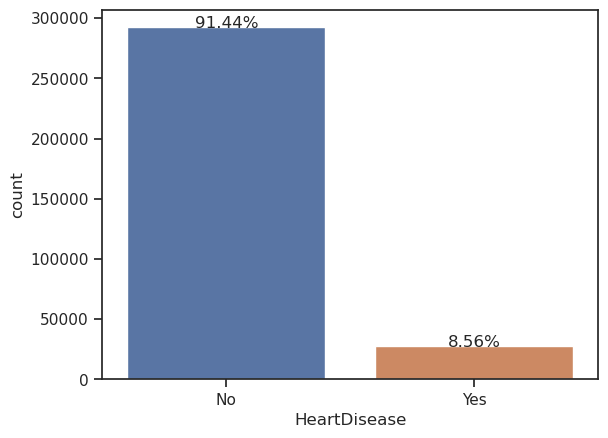

In [19]:
sns.set_theme(style="ticks")
ax = sns.countplot(data=df, x='HeartDisease')

# Adicionando porcentagens

total = float(len(df))  # Total de observações
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, '{:.2f}%'.format((height / total) * 100), ha="center")

# Mostrando o gráfico
plt.show()

In [20]:
df['HeartDisease'].count()

319795

# Data Preparation

In [21]:
# Alterar Features de 'Yes' para 1, e 'No' para 0 para futuras análises

df['HeartDisease'] = df['HeartDisease'].map({'Yes': 1, 'No': 0})
df['Smoking'] = df['Smoking'].map({'Yes': 1, 'No': 0})
df['AlcoholDrinking'] = df['AlcoholDrinking'].map({'Yes': 1, 'No': 0})
df['Stroke'] = df['Stroke'].map({'Yes': 1, 'No': 0})
df['DiffWalking'] = df['DiffWalking'].map({'Yes': 1, 'No': 0})
df['PhysicalActivity'] = df['PhysicalActivity'].map({'Yes': 1, 'No': 0})
df['Asthma'] = df['Asthma'].map({'Yes': 1, 'No': 0})
df['KidneyDisease'] = df['KidneyDisease'].map({'Yes': 1, 'No': 0})
df['SkinCancer'] = df['SkinCancer'].map({'Yes': 1, 'No': 0})
df['HeartDisease_FamilyHistory'] = df['HeartDisease_FamilyHistory'].map({'Yes': 1, 'No': 0})


In [22]:
# Exibir o DataFrame resultante

df.head(7)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease_FamilyHistory,State
0,0,16.60,1,0.00,0.00,3.00,30.00,0,Female,55-59,White,Yes,1,Very good,5.00,1,0,1.00,0.00,MT
1,0,20.34,0,NaN,1.00,0.00,0.00,0,Female,80 or older,White,No,1,Very good,7.00,0,0,0.00,NaN,VT
2,0,26.58,1,NaN,0.00,20.00,30.00,0,Male,65-69,White,Yes,1,Fair,8.00,1,0,0.00,NaN,WY
3,0,24.21,0,NaN,0.00,0.00,0.00,0,Female,75-79,White,No,0,Good,6.00,0,0,1.00,0.00,VT
4,0,23.71,0,0.00,0.00,28.00,0.00,1,Female,40-44,White,No,1,Very good,8.00,0,0,0.00,NaN,DC
5,1,28.87,1,0.00,0.00,6.00,0.00,1,Female,75-79,Black,No,0,Fair,12.00,0,0,0.00,NaN,PA
6,0,21.63,0,0.00,0.00,15.00,0.00,0,Female,70-74,White,No,1,Fair,4.00,1,0,1.00,NaN,AK


In [23]:
df['HeartDisease'].value_counts()

0    292422
1     27373
Name: HeartDisease, dtype: int64

In [24]:
df.describe(include=['object']).T

,count,unique,top,freq
Sex,319795,2,Female,167805
AgeCategory,319795,14,65-69,34143
Race,319795,6,White,245212
Diabetic,319795,4,No,269653
GenHealth,319795,5,Very good,113858
State,319795,51,OH,6429


In [25]:
# Criação do DataFrame com a coluna AgeCategory

data = df['AgeCategory']
data

0               55-59
1         80 or older
2               65-69
3               75-79
4               40-44
             ...     
319790          60-64
319791          35-39
319792          45-49
319793          25-29
319794    80 or older
Name: AgeCategory, Length: 319795, dtype: object

In [26]:
# Função para converter o intervalo em valor float e substituir "80 or older" por "80"

df_ages = pd.DataFrame(data)

def calcular_media(intervalo):
    if '-' in intervalo:
        inicio, fim = map(int, intervalo.split('-'))
        return (inicio + fim) / 2
    elif intervalo == '80 or older':
        return 80
    else:
        return None

# Aplicando a função para calcular a média em cada intervalo e armazenando em uma nova coluna

df_ages['AgeFloat'] = df_ages['AgeCategory'].apply(calcular_media)
df_ages = pd.DataFrame(df_ages)

print(df_ages)

        AgeCategory  AgeFloat
0             55-59     57.00
1       80 or older     80.00
2             65-69     67.00
3             75-79     77.00
4             40-44     42.00
...             ...       ...
319790        60-64     62.00
319791        35-39     37.00
319792        45-49     47.00
319793        25-29     27.00
319794  80 or older     80.00

[319795 rows x 2 columns]


In [27]:
# Concatenando o DataFrame original com o DataFrame contendo 'AgeFloat' e dropando 'AgeCategory'

df = pd.concat([df, df_ages], axis=1)
df = df.drop('AgeCategory', axis=1)


In [28]:
df.head(3)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease_FamilyHistory,State,AgeFloat
0,0,16.60,1,0.00,0.00,3.00,30.00,0,Female,White,Yes,1,Very good,5.00,1,0,1.00,0.00,MT,57.00
1,0,20.34,0,NaN,1.00,0.00,0.00,0,Female,White,No,1,Very good,7.00,0,0,0.00,NaN,VT,80.00
2,0,26.58,1,NaN,0.00,20.00,30.00,0,Male,White,Yes,1,Fair,8.00,1,0,0.00,NaN,WY,67.00


In [29]:
df['AgeFloat'].value_counts() # Contando valores de AgeFloat

67.00    34143
62.00    33680
72.00    31060
57.00    29753
52.00    25378
80.00    24150
47.00    21787
77.00    21478
21.00    21062
42.00    20999
37.00    20545
32.00    18746
27.00    16955
Name: AgeFloat, dtype: int64

In [30]:
print(df.isnull().sum())  # Conta o número de valores NaN em cada coluna

HeartDisease                       0
BMI                                0
Smoking                            0
AlcoholDrinking               106811
Stroke                          1112
PhysicalHealth                     0
MentalHealth                       0
DiffWalking                        0
Sex                                0
Race                               0
Diabetic                           0
PhysicalActivity                   0
GenHealth                          0
SleepTime                          0
Asthma                             0
KidneyDisease                      0
SkinCancer                       349
HeartDisease_FamilyHistory    284532
State                              0
AgeFloat                          59
dtype: int64


In [31]:
df.fillna(0, inplace=True)  # Substituindo os valores NaN por 0

In [32]:
print(df.isnull().sum())  # Conta o número de valores NaN em cada coluna

HeartDisease                  0
BMI                           0
Smoking                       0
AlcoholDrinking               0
Stroke                        0
PhysicalHealth                0
MentalHealth                  0
DiffWalking                   0
Sex                           0
Race                          0
Diabetic                      0
PhysicalActivity              0
GenHealth                     0
SleepTime                     0
Asthma                        0
KidneyDisease                 0
SkinCancer                    0
HeartDisease_FamilyHistory    0
State                         0
AgeFloat                      0
dtype: int64


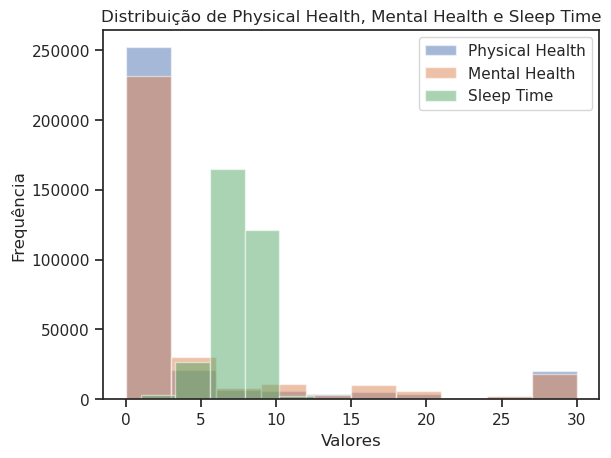

In [33]:
# Definindo os parâmetros do histograma

hist_params = {
    'kind': 'hist',
    #'bins': 100,
    'alpha': 0.5,  # Adicionando transparência para melhor visualização
}
#plt.figure(figsize=[16,10])
# Plotando os histogramas
df['PhysicalHealth'].plot(label='Physical Health', **hist_params)
df['MentalHealth'].plot(label='Mental Health', **hist_params)
df['SleepTime'].plot(label='Sleep Time', **hist_params)

# Adicionando a legenda e o título
plt.legend()
plt.title('Distribuição de Physical Health, Mental Health e Sleep Time')
plt.xlabel('Valores')
plt.ylabel('Frequência')

# Exibindo o gráfico
plt.show()

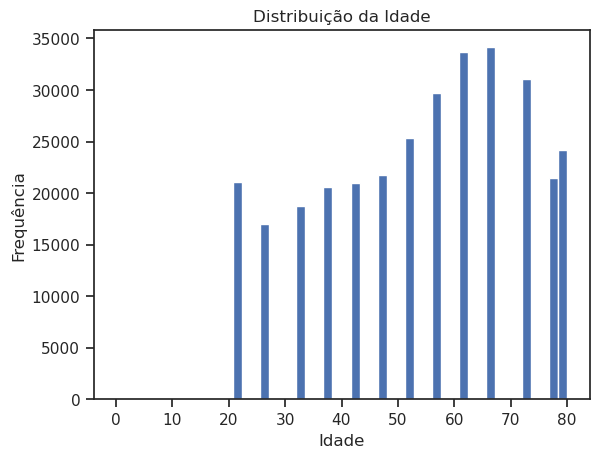

In [34]:
df['AgeFloat'].plot(kind='hist', bins = 50)
plt.title('Distribuição da Idade')  # Adiciona o título
plt.xlabel('Idade')  # Adiciona um rótulo para o eixo x
plt.ylabel('Frequência')  # Adiciona um rótulo para o eixo y
plt.show()

<AxesSubplot:ylabel='AgeFloat'>

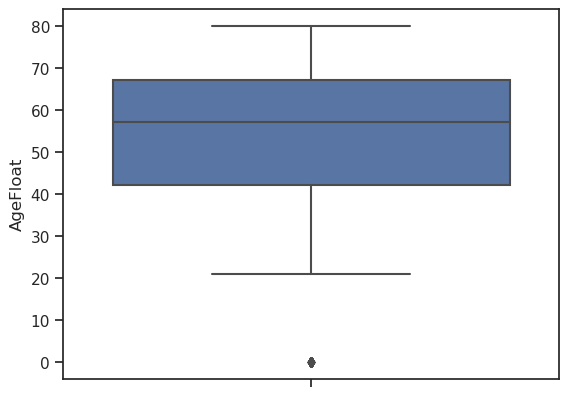

In [35]:
sns.boxplot(data=df, y='AgeFloat')

<AxesSubplot:xlabel='HeartDisease', ylabel='AgeFloat'>

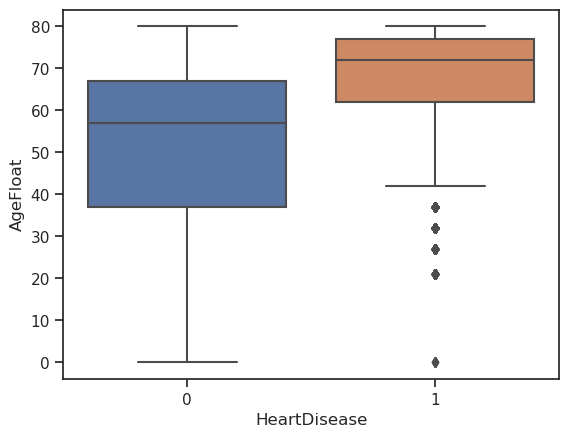

In [36]:
## with target
sns.boxplot(data=df, x='HeartDisease', y='AgeFloat')

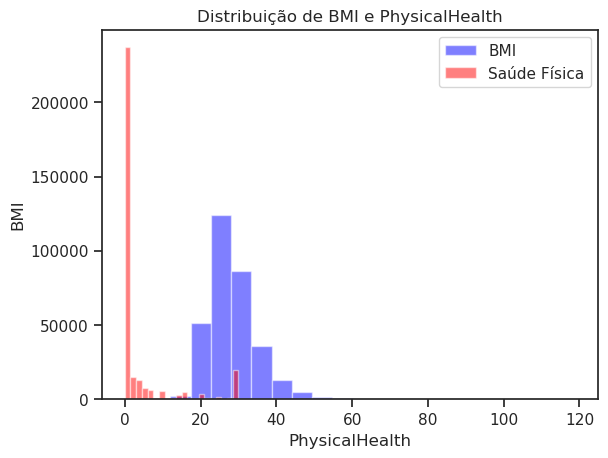

In [37]:
df['BMI'].plot(kind='hist', alpha=.5, bins = 20, color="blue")
df['PhysicalHealth'].plot(kind='hist', alpha=.5, bins = 20, color="red")
plt.title('Distribuição de BMI e PhysicalHealth')
plt.xlabel('PhysicalHealth')
plt.ylabel('BMI')
plt.legend(['BMI', 'Saúde Física'])
plt.show()

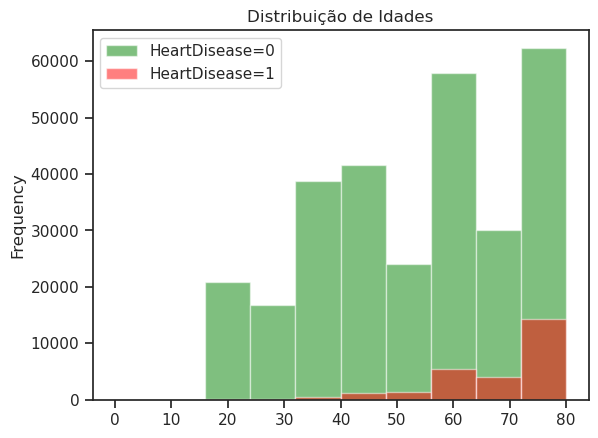

In [38]:
df[df.HeartDisease == 0]['AgeFloat'].plot(kind='hist', alpha=.5, color="green")
df[df.HeartDisease == 1]['AgeFloat'].plot(kind='hist', alpha=.5, color="red")
plt.title('Distribuição de Idades')
plt.legend(['HeartDisease=0', 'HeartDisease=1'])
plt.show()

Text(0.5, 1.0, 'Distribuição de Idades')

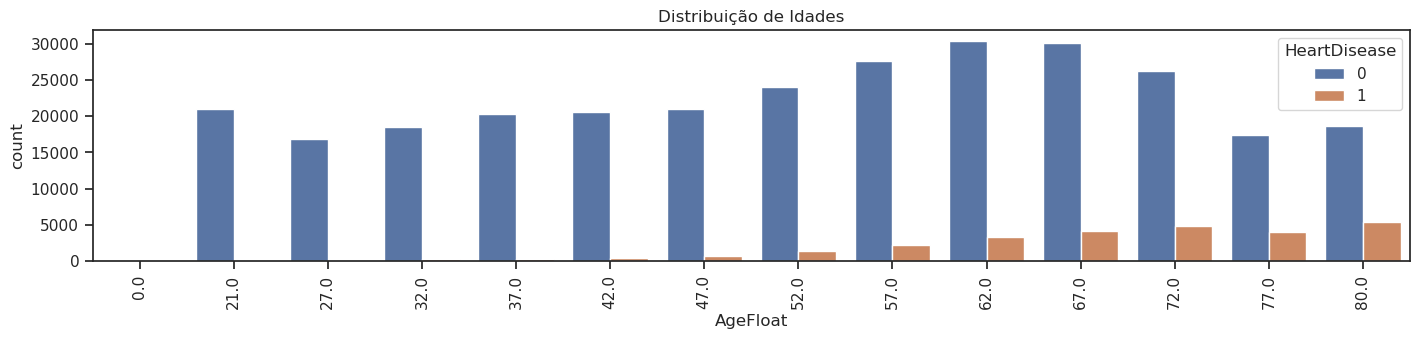

In [39]:
plt.figure(figsize=[17,3])
plt.xticks(rotation=90)
sns.countplot(data=df, x='AgeFloat', hue='HeartDisease')
plt.title('Distribuição de Idades')

In [40]:
df.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
Sex,319795,2,Female,167805
Race,319795,6,White,245212
Diabetic,319795,4,No,269653
GenHealth,319795,5,Very good,113858
State,319795,51,OH,6429


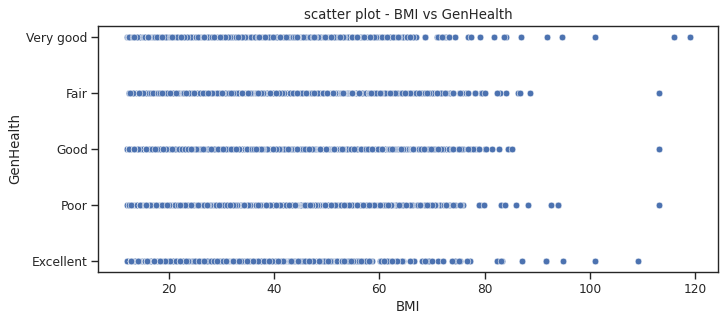

In [41]:
plt.figure(figsize=(10, 4), dpi=80)
sns.scatterplot(data=df, x="BMI", y="GenHealth")
plt.title("scatter plot - BMI vs GenHealth")
plt.show()

In [42]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease_FamilyHistory,State,AgeFloat
0,0,16.60,1,0.00,0.00,3.00,30.00,0,Female,White,Yes,1,Very good,5.00,1,0,1.00,0.00,MT,57.00
1,0,20.34,0,0.00,1.00,0.00,0.00,0,Female,White,No,1,Very good,7.00,0,0,0.00,0.00,VT,80.00
2,0,26.58,1,0.00,0.00,20.00,30.00,0,Male,White,Yes,1,Fair,8.00,1,0,0.00,0.00,WY,67.00
3,0,24.21,0,0.00,0.00,0.00,0.00,0,Female,White,No,0,Good,6.00,0,0,1.00,0.00,VT,77.00
4,0,23.71,0,0.00,0.00,28.00,0.00,1,Female,White,No,1,Very good,8.00,0,0,0.00,0.00,DC,42.00


 ONE HOT ENCODING

In [43]:
def OHE(df, column_name):
    dummy_dataset = pd.get_dummies(df[column_name], prefix = column_name)
    df = pd.concat([df, dummy_dataset], axis = 1)
    df.drop(column_name, axis = 1, inplace = True)
    del dummy_dataset

    return df

In [44]:
df = OHE(df, 'AgeFloat')

In [45]:
df = OHE(df, 'Sex')

In [46]:
df = OHE(df, 'Race')

In [47]:
df = OHE(df, 'Diabetic')

In [48]:
df = OHE(df, 'GenHealth')

In [49]:
df = OHE(df, 'State')

In [50]:
df.head().T

,0,1,2,3,4
HeartDisease,0.00,0.00,0.00,0.00,0.00
BMI,16.60,20.34,26.58,24.21,23.71
Smoking,1.00,0.00,1.00,0.00,0.00
AlcoholDrinking,0.00,0.00,0.00,0.00,0.00
Stroke,0.00,1.00,0.00,0.00,0.00
PhysicalHealth,3.00,0.00,20.00,0.00,28.00
MentalHealth,30.00,0.00,30.00,0.00,0.00
DiffWalking,0.00,0.00,0.00,0.00,1.00
PhysicalActivity,1.00,1.00,1.00,0.00,1.00
SleepTime,5.00,7.00,8.00,6.00,8.00


In [51]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Columns: 96 entries, HeartDisease to State_WY
dtypes: float64(8), int64(6), uint8(82)
memory usage: 59.2 MB


# Modeling

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
# Dividir o conjunto de dados em 60%, 20% e 20%
train_set, test_set = train_test_split(df, test_size=0.4, random_state=42)
valid_set, test_set = train_test_split(test_set, test_size=0.5, random_state=42)

# Exibir os tamanhos dos conjuntos de dados
print("Tamanho do conjunto de treinamento:", len(train_set))
print("Tamanho do conjunto de validação:", len(valid_set))
print("Tamanho do conjunto de teste:", len(test_set))

Tamanho do conjunto de treinamento: 191877
Tamanho do conjunto de validação: 63959
Tamanho do conjunto de teste: 63959


In [54]:
191877 + 63959 + 63959

319795

In [55]:
train_set.shape

(191877, 96)

In [56]:
valid_set.shape

(63959, 96)

In [57]:
test_set.shape

(63959, 96)

Once we have our partitions, we are going to store all the features and the target as X and y variables.

In [58]:
dev_df_X = train_set.drop('HeartDisease', axis=1)
dev_df_y = train_set[['HeartDisease']]

In [59]:
val_df_X = valid_set.drop('HeartDisease', axis=1)
val_df_y = valid_set[['HeartDisease']]

In [60]:
dev_df_X.head().T

,302569,191464,265583,276581,186465
BMI,38.01,23.38,36.02,25.69,25.50
Smoking,0.00,0.00,1.00,0.00,0.00
AlcoholDrinking,0.00,0.00,0.00,0.00,0.00
Stroke,0.00,0.00,0.00,0.00,1.00
PhysicalHealth,0.00,0.00,30.00,15.00,0.00
MentalHealth,2.00,0.00,30.00,12.00,0.00
DiffWalking,0.00,0.00,0.00,1.00,0.00
PhysicalActivity,1.00,1.00,0.00,1.00,1.00
SleepTime,7.00,9.00,8.00,6.00,8.00
Asthma,0.00,0.00,1.00,0.00,0.00


In [61]:
dev_df_y.head(10).T

,302569,191464,265583,276581,186465,306768,265718,25080,104735,17566
HeartDisease,0,0,0,0,0,0,0,1,0,1


Determine validation strategy (Random Holdout) & partition policy for test set (random)

In [62]:
from sklearn import model_selection # model assesment and model selection strategies
from sklearn import metrics # model evaluation metrics

In [63]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                        dev_df_X, # X
                                        dev_df_y, # y
                                        test_size = 0.30,
                                        random_state = 42
                                     )

In [64]:
X_train.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134313 entries, 266085 to 216281
Columns: 95 entries, BMI to State_WY
dtypes: float64(8), int64(5), uint8(82)
memory usage: 24.8 MB


In [65]:
X_test.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57564 entries, 312785 to 26395
Columns: 95 entries, BMI to State_WY
dtypes: float64(8), int64(5), uint8(82)
memory usage: 10.7 MB


In [66]:
X_train.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
BMI,"134,313.00",28.33,6.37,12.02,24.02,27.32,31.46,116.00
Smoking,"134,313.00",0.41,0.49,0.00,0.00,0.00,1.00,1.00
AlcoholDrinking,"134,313.00",0.07,0.25,0.00,0.00,0.00,0.00,1.00
Stroke,"134,313.00",0.04,0.19,0.00,0.00,0.00,0.00,1.00
PhysicalHealth,"134,313.00",3.35,7.93,0.00,0.00,0.00,2.00,30.00


In [67]:
X_test.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
BMI,"57,564.00",28.32,6.30,12.08,24.03,27.34,31.32,109.00
Smoking,"57,564.00",0.41,0.49,0.00,0.00,0.00,1.00,1.00
AlcoholDrinking,"57,564.00",0.07,0.25,0.00,0.00,0.00,0.00,1.00
Stroke,"57,564.00",0.04,0.19,0.00,0.00,0.00,0.00,1.00
PhysicalHealth,"57,564.00",3.41,8.00,0.00,0.00,0.00,2.00,30.00


In [68]:
y_train.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
HeartDisease,"134,313.00",0.08,0.28,0.00,0.00,0.00,0.00,1.00


In [69]:
y_test.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
HeartDisease,"57,564.00",0.09,0.28,0.00,0.00,0.00,0.00,1.00


# Model Definition
Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [71]:
dt = DecisionTreeClassifier(
                        # criterion='gini',
                        # splitter='best',
                        max_depth=4, # Important, regulate over-adjustment
                        # min_samples_split=2, # minimum number of observations in each split
                        # min_samples_leaf=1, # minimum number of observations in each leaf
                        # min_weight_fraction_leaf=0.0,
                        # max_features=None,
                        random_state=42,
                        # max_leaf_nodes=None,
                        # min_impurity_decrease=0.0,
                        # min_impurity_split=None,
                        # class_weight=None,
                        # presort=False,
)

In [72]:
### Train model
dt.fit(
    X=X_train,
    y=y_train,
    # sample_weight=None,
    # check_input=True,
    # X_idx_sorted=None
)

DecisionTreeClassifier(max_depth=4, random_state=42)

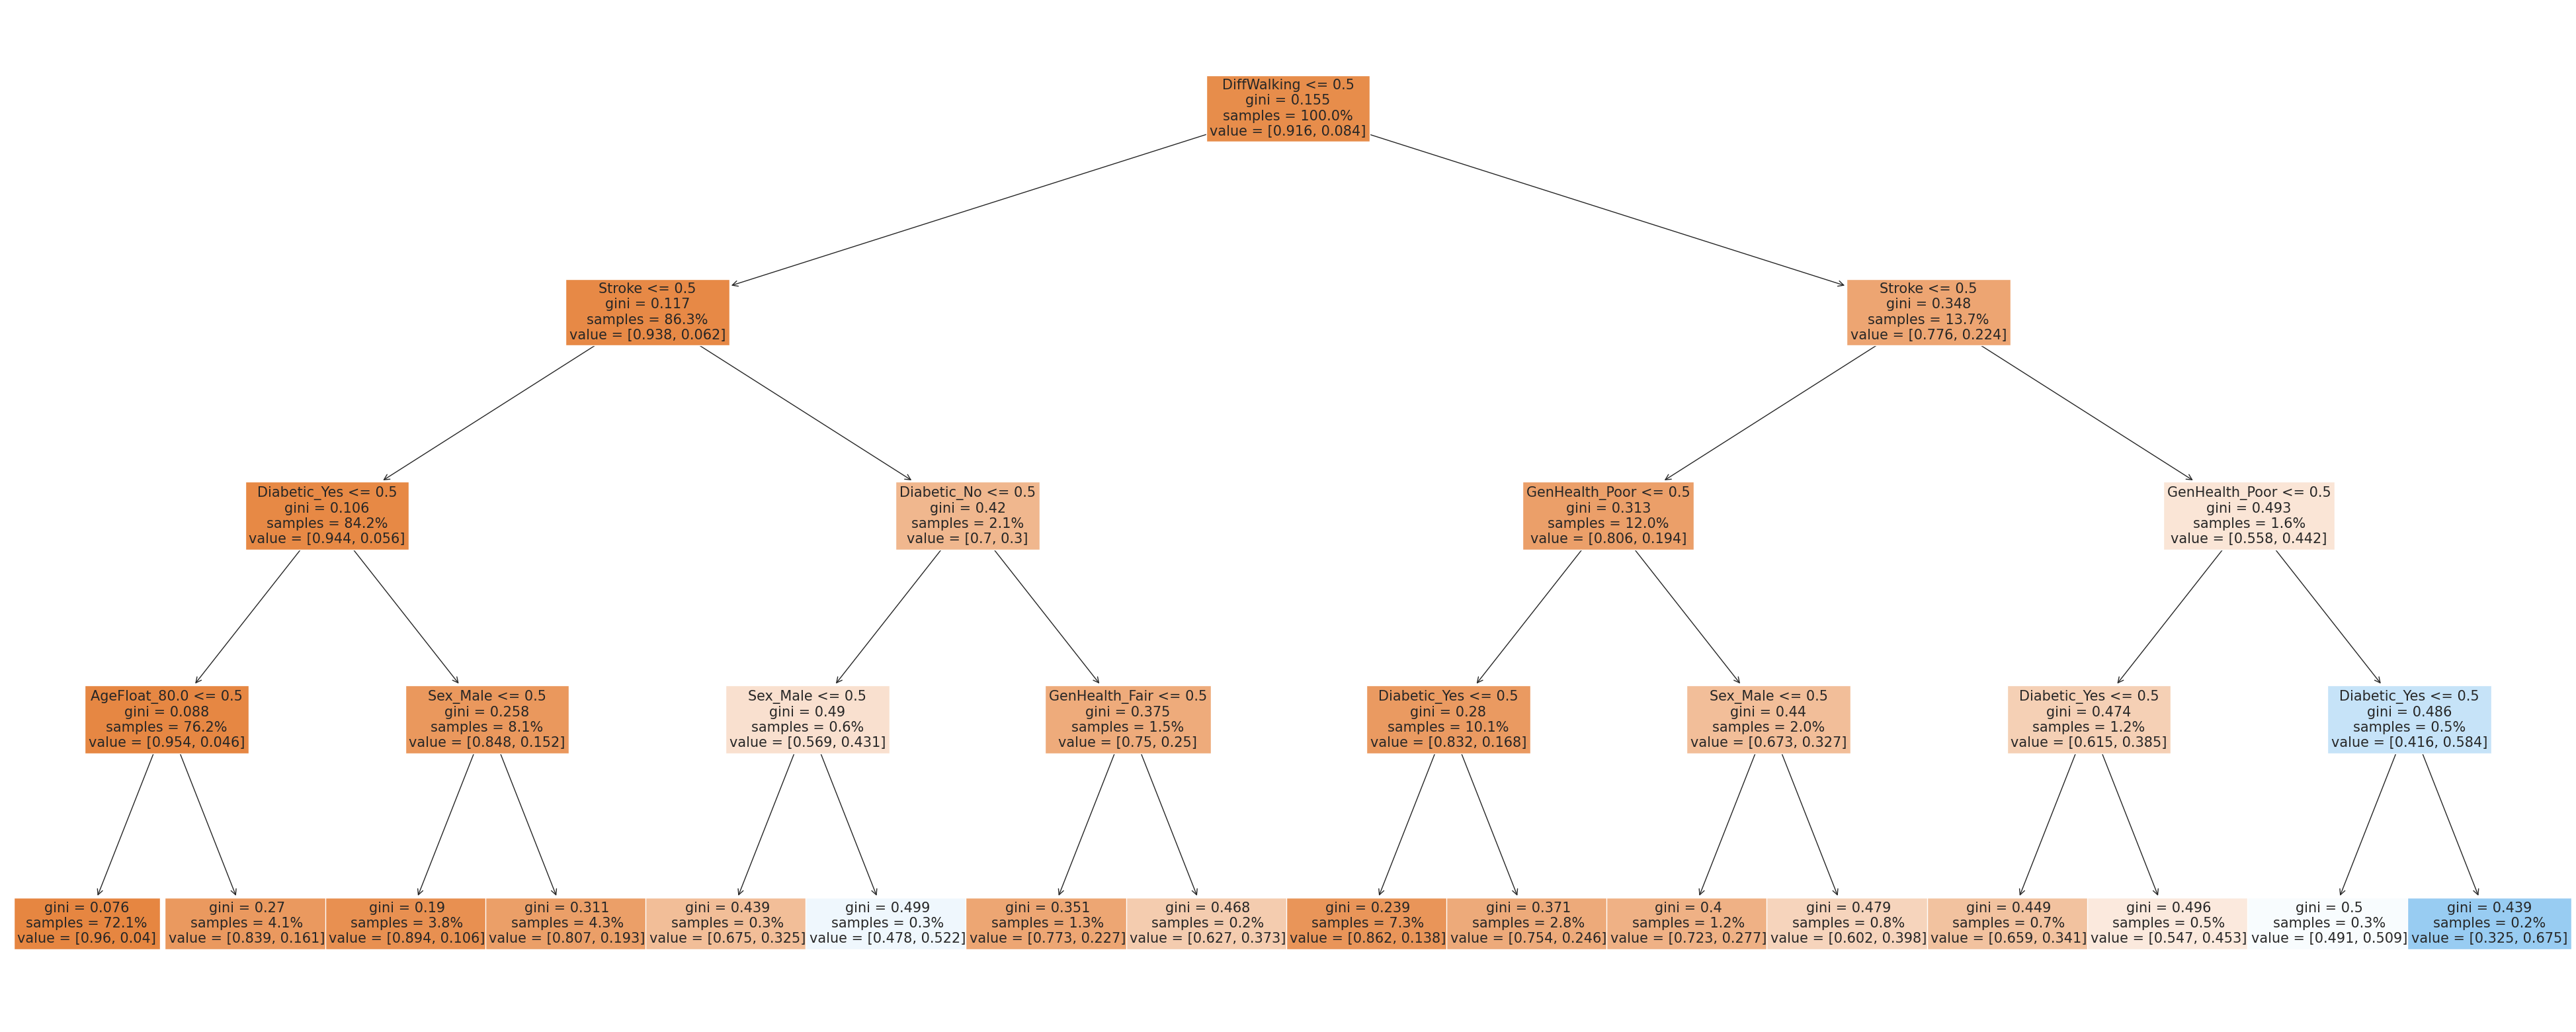

In [73]:
fig, ax = plt.subplots(figsize=(50,20))
tree.plot_tree(dt,
               ax = ax,
               fontsize = 15,
               proportion=True,
               filled = True,
               feature_names = X_test.columns);

índice de Gini, é uma medida de impureza usada em árvores de decisão para avaliar a qualidade de uma divisão de dados. Em uma árvore de decisão, o objetivo é encontrar as divisões nos dados que melhor separam as diferentes classes ou categorias do conjunto de dados. O índice de Gini é uma das métricas usadas para determinar a pureza das divisões.

Em termos simples, quanto menor o índice de Gini, mais puro é o nó da árvore, o que significa que os exemplos pertencem predominantemente a uma única classe. Por outro lado, um índice de Gini mais alto indica que os exemplos estão distribuídos entre várias classes, o que torna a divisão menos eficaz em termos de separação.

From the visualization of the tree we can see that the most relevant variable is **DiffWalking**

Text(0.5, 0, 'Random Forest Feature Importance')

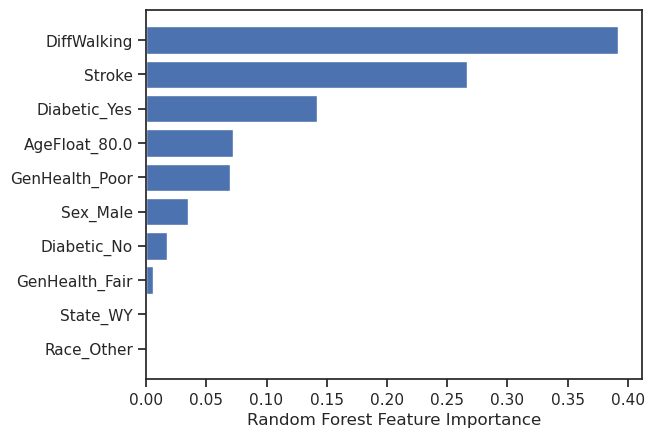

In [74]:
sorted_idx = dt.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx][-10:], dt.feature_importances_[sorted_idx][-10:])
plt.xlabel("Random Forest Feature Importance")

DiffWalking is clearly the main variable of the model. Why is that? Let's carry out a similar univariate analysis to the ones we've done before for other variables.

Text(0.5, 1.0, 'HeartDisease X DiffWalking')

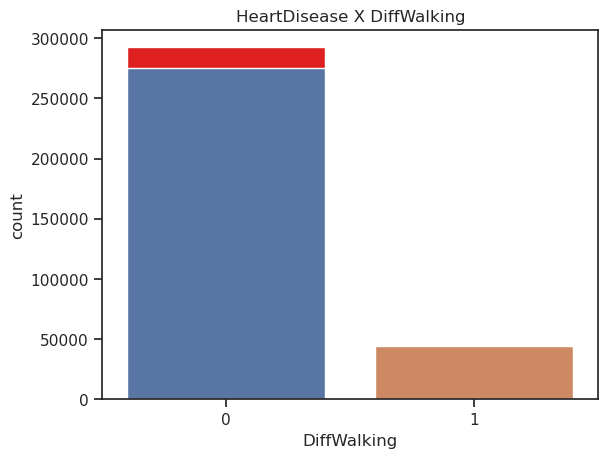

In [75]:
sns.countplot(data=df, x='HeartDisease', color='red')
sns.countplot(data=df, x='DiffWalking')
plt.title(label='HeartDisease X DiffWalking')


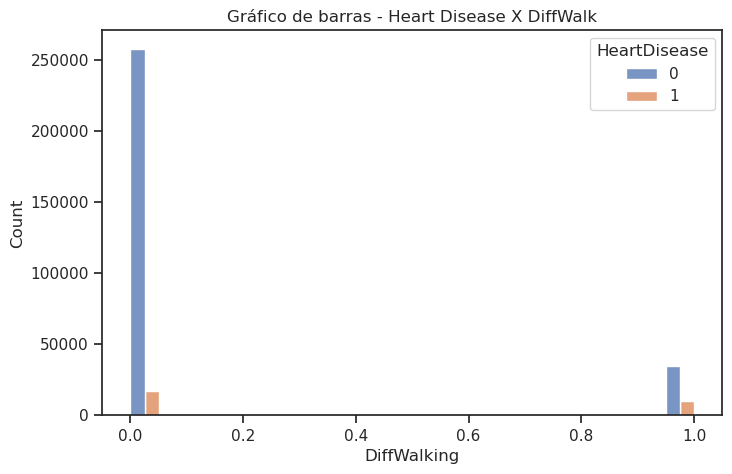

In [76]:
plt.figure(figsize=(8, 5), dpi=100)
sns.histplot(data=df, x="DiffWalking", hue="HeartDisease", multiple="dodge")
plt.title("Gráfico de barras - Heart Disease X DiffWalk")
plt.show()

In [77]:
# Drop table DiffWalking

#X_train.drop('DiffWalking',axis=1, inplace = True)
#X_test.drop('DiffWalking',axis=1, inplace=True)
#val_df_X.drop('DiffWalking',axis=1, inplace=True)

In [78]:
### Train model
dt.fit(
    X=X_train,
    y=y_train,
    # sample_weight=None,
    # check_input=True,
    # X_idx_sorted=None
)

DecisionTreeClassifier(max_depth=4, random_state=42)

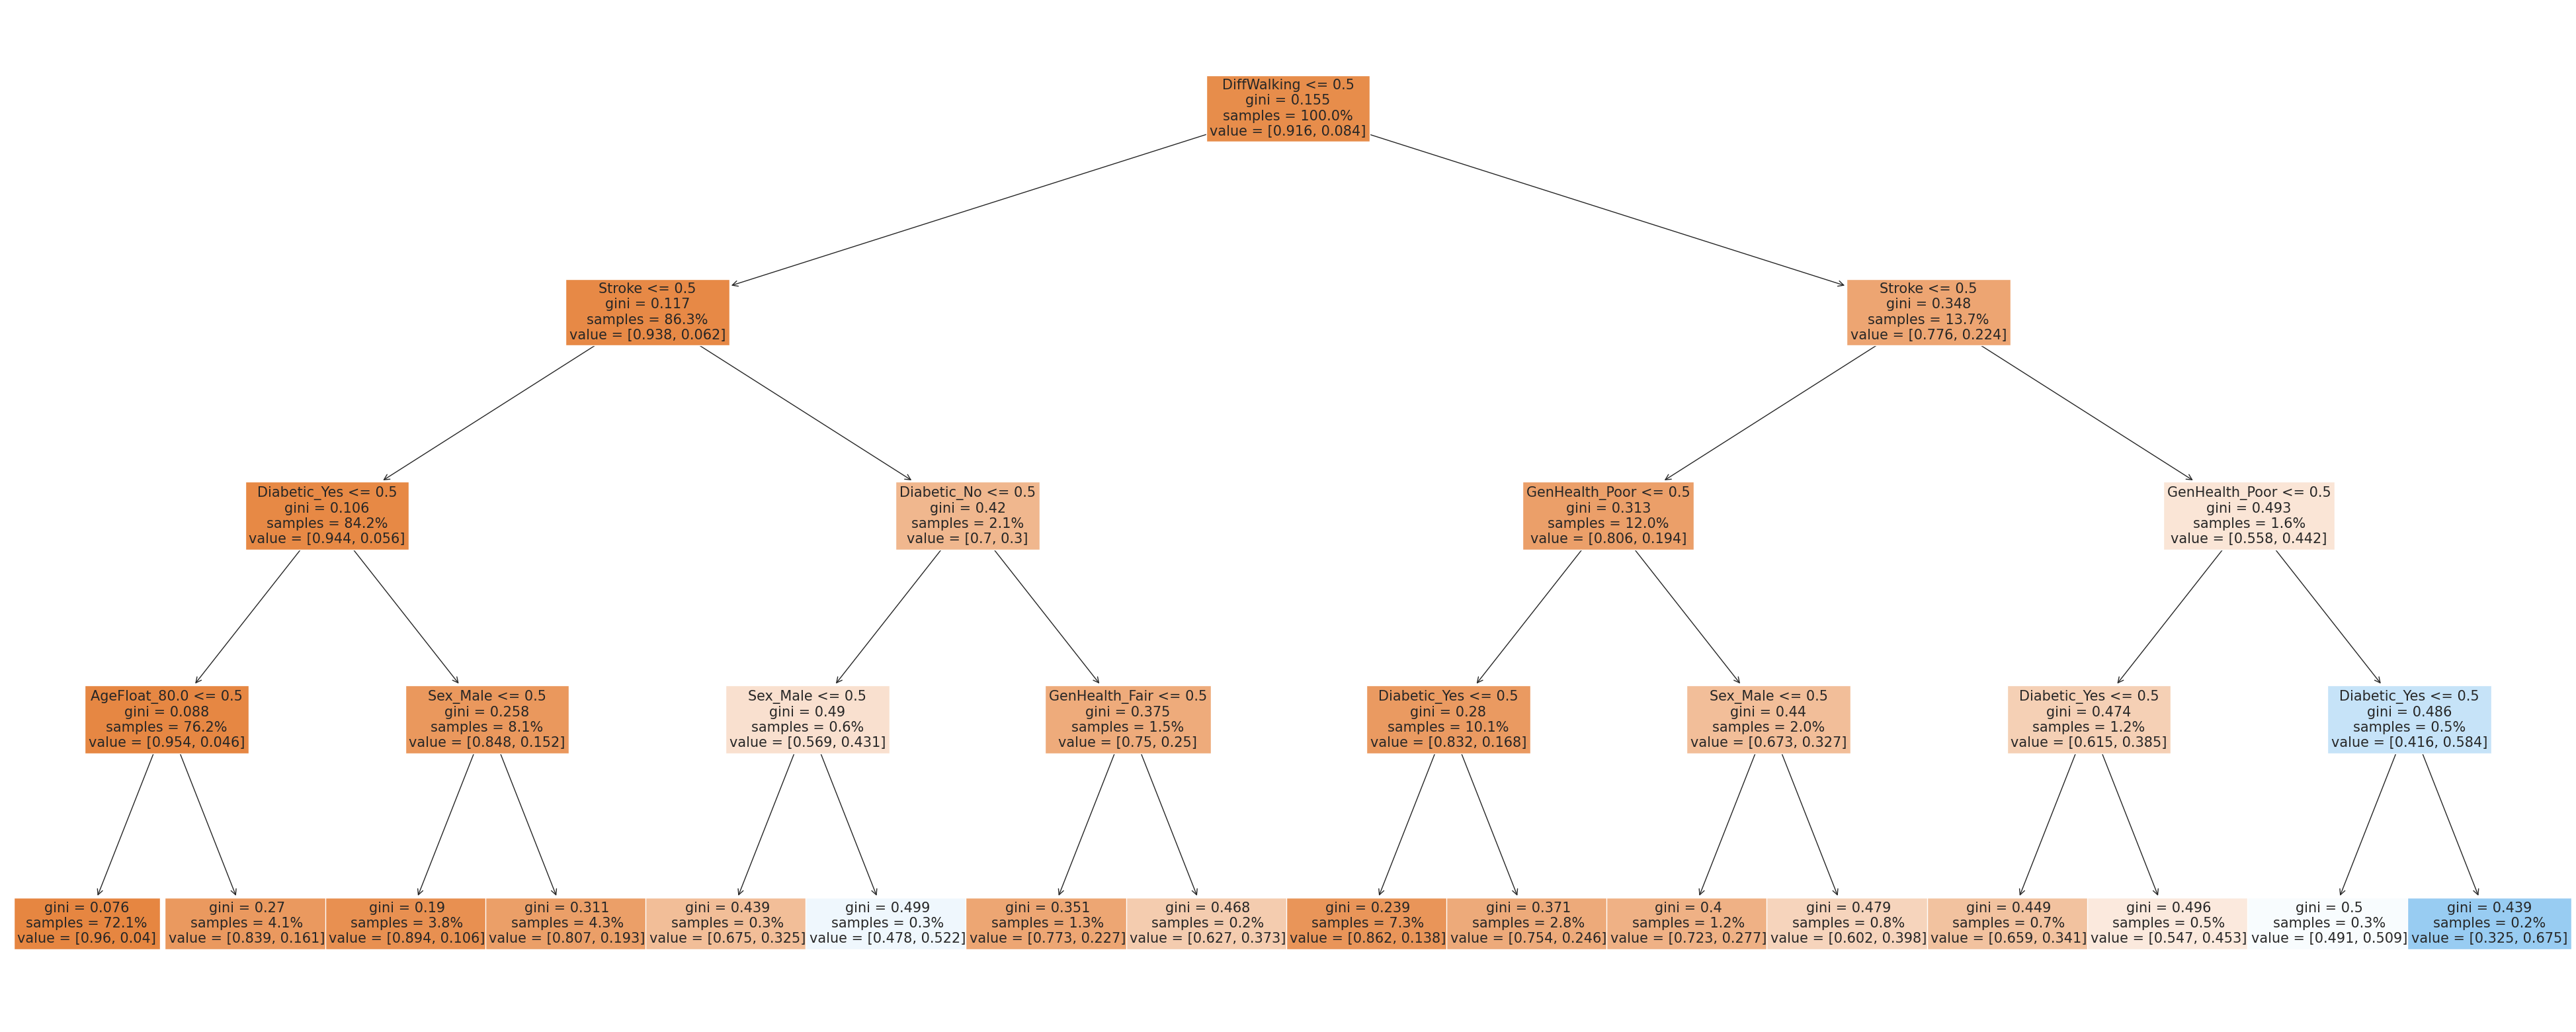

In [79]:
fig, ax = plt.subplots(figsize=(50,20))
tree.plot_tree(dt,
               ax = ax,
               fontsize = 15,
               proportion=True,
               filled = True,
               feature_names = X_test.columns);

# Evaluation over train dataset
 Get predictions for the train set

In [80]:
y_train_pred = pd.DataFrame(dt.predict(X_train), index=y_train.index, columns=['Prediction'])

Portanto, o comando geral cria um DataFrame chamado y_train_pred que contém as previsões feitas pelo modelo de árvore de decisão para os dados de treinamento, com índices correspondentes aos da série y_train e uma única coluna chamada 'Prediction' contendo as previsões.

In [81]:
y_train_pred.head()

,Prediction
266085,0
166751,0
214477,0
241,0
170468,0


In [82]:
y_train.head()

,HeartDisease
266085,0
166751,0
214477,0
241,0
170468,0


In [83]:
y_train.shape

(134313, 1)

In [84]:
y_train_pred.shape

(134313, 1)

In [85]:
results_df = y_train.join(y_train_pred, how= 'inner')

Então, join() combina as duas séries (y_train e y_train_pred) em um novo DataFrame chamado results_df. Este DataFrame conterá os valores reais (y_train) e as previsões do modelo (y_train_pred) lado a lado para os exemplos de treinamento, com base nos índices compartilhados entre as duas séries.

In [86]:
results_df['Success'] = (results_df['HeartDisease'] == results_df['Prediction']).astype(int)

Esta parte do código compara os valores das colunas 'HeartDisease' e 'Prediction' no DataFrame results_df. Ele retorna uma série de valores booleanos onde cada elemento é True se o valor correspondente em 'HeartDisease' for igual ao valor correspondente em 'Prediction', e False caso contrário.

.astype(int): Este é um método que converte os valores booleanos (True/False) em valores inteiros (0 para False e 1 para True). Portanto, após esta etapa, teremos uma série de valores inteiros, onde 1 indica que a previsão foi bem-sucedida (os valores em 'HeartDisease' e 'Prediction' são iguais) e 0 indica que a previsão foi mal-sucedida (os valores são diferentes).

results_df['Success'] = ...: Finalmente, estamos atribuindo os resultados da comparação e conversão de tipos à nova coluna 'Success' no DataFrame results_df. Portanto, esta linha cria uma nova coluna chamada 'Success' que indica se a previsão do modelo foi bem-sucedida (1) ou mal-sucedida (0) com base na comparação entre 'HeartDisease' e 'Prediction'.

In [87]:
results_df.head(20)

,HeartDisease,Prediction,Success
266085,0,0,1
166751,0,0,1
214477,0,0,1
241,0,0,1
170468,0,0,1
210486,0,0,1
253737,0,0,1
168733,0,0,1
162644,0,0,1
10185,0,0,1


In [88]:
results_df['Success'].count()

134313

In [89]:
results_df['Success'].sum()

123102

In [90]:
results_df['Success'].mean()

0.9165307900203257

In [91]:
print('TRAIN - We have correctly predicted {} from a total of {}. The accuracy is {}.'.format(results_df['Success'].sum(), results_df['Success'].count(), results_df['Success'].mean()))

TRAIN - We have correctly predicted 123102 from a total of 134313. The accuracy is 0.9165307900203257.


In [92]:
# Confusion matrix

confusion_matrix = pd.crosstab(results_df['HeartDisease'], results_df['Prediction'])

pd.crosstab(): Esta é uma função do pandas que cria uma tabela de frequência cruzada, também conhecida como tabela de contingência. Neste caso, ele cria uma tabela que mostra a frequência com que os rótulos reais (HeartDisease) e as previsões do modelo (DelayPrediction) coincidem.

A matriz de confusão resultante, armazenada na variável confusion_matrix, terá as previsões corretas (verdadeiros positivos e verdadeiros negativos) na diagonal principal e os erros de previsão (falsos positivos e falsos negativos) fora da diagonal principal. Essa matriz é uma ferramenta útil para avaliar o desempenho de um modelo de classificação.

In [93]:
confusion_matrix

Prediction,0,1
HeartDisease,,
0,122516,462
1,10749,586


In [94]:
TP = confusion_matrix.iloc[1,1]
TN = confusion_matrix.iloc[0,0]
FP = confusion_matrix.iloc[0,1]
FN = confusion_matrix.iloc[1,0]

In [95]:
accuracy = (TP + TN) / (TP + TN + FP + FN)

accuracy

0.9165307900203257

In [96]:
Precision = TP / (TP+FP)
Recall = TP/(TP+FN)
print(Precision)
print(Recall)

0.5591603053435115
0.05169827966475518


**Precision** is the accuracy of positive predictions, Consider a model with a precision of 70% When it claims a positive, it’s only correct 70%

**Recall** is the ratio of positive instances correctly detected Consider a model with a recall of 82%


In [97]:
# Metrics Modules

confusion_matrix_m = metrics.confusion_matrix(results_df['HeartDisease'],results_df['Prediction'])
Accuracy_m = metrics.accuracy_score(results_df['HeartDisease'], results_df['Prediction'])
Precision_m = metrics.precision_score(results_df['HeartDisease'],results_df['Prediction'])
Recall_m = metrics.recall_score(results_df['HeartDisease'],results_df['Prediction'])

print("Confusion matrix: ", confusion_matrix_m)
print("Accuracy: ", Accuracy_m)
print("Precision: ", Precision_m)
print("Recall: ", Recall_m)


Confusion matrix:  [[122516    462]
 [ 10749    586]]
Accuracy:  0.9165307900203257
Precision:  0.5591603053435115
Recall:  0.05169827966475518


In [98]:
dt.score(X_test, y_test)

0.9120804669585157

Evaluation over test dataset
a) Get predictions for the test set

In [99]:
y_test_pred = pd.DataFrame(dt.predict(X_test), index=y_test.index, columns=['Prediction'])

In [100]:
results_df_test = y_test.join(y_test_pred, how= 'inner')
results_df_test['Success'] = (results_df_test['HeartDisease'] == results_df_test['Prediction']).astype(int)

In [101]:
confusion_matrix_m_test = metrics.confusion_matrix(results_df_test['HeartDisease'],results_df_test['Prediction'])
Accuracy_m_test = metrics.accuracy_score(results_df_test['HeartDisease'], results_df_test['Prediction'])
Precision_m_test = metrics.precision_score(results_df_test['HeartDisease'],results_df_test['Prediction'])
Recall_m_test = metrics.recall_score(results_df_test['HeartDisease'],results_df_test['Prediction'])

print("Confusion matrix: ", confusion_matrix_m_test)
print("Accuracy: ", Accuracy_m_test)
print("Precision: ", Precision_m_test)
print("Recall: ", Recall_m_test)

Confusion matrix:  [[52270   243]
 [ 4818   233]]
Accuracy:  0.9120804669585157
Precision:  0.4894957983193277
Recall:  0.04612947931102752


In [102]:
y_score = pd.DataFrame(dt.predict_proba(X_test)[:,1], index=y_test.index, columns=['DelayScore'])

In [103]:
results_df_test = results_df_test.join(y_score)

In [104]:
results_df_test.head(10)

,HeartDisease,Prediction,Success,DelayScore
312785,0,0,1,0.04
264181,0,0,1,0.04
71814,0,0,1,0.04
226164,0,0,1,0.04
318604,0,0,1,0.04
228467,0,0,1,0.04
139381,0,0,1,0.04
84277,0,0,1,0.04
177909,0,0,1,0.04
286800,0,0,1,0.04


In [105]:
results_df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57564 entries, 312785 to 26395
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HeartDisease  57564 non-null  int64  
 1   Prediction    57564 non-null  int64  
 2   Success       57564 non-null  int64  
 3   DelayScore    57564 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 4.2 MB


# Model optimization
Hyperparameter optimization : Let's evaluate how the model's performance varies with different values of the depth parameter

In [106]:
for i in range(1, 20):
    dt = DecisionTreeClassifier(max_depth=i, random_state=42)
    dt.fit(X_train, y_train)
    train_accuracy = dt.score(X_train, y_train)
    test_accuracy = dt.score(X_test, y_test)
    print('Tree max_depth: {}. Train: {} - Test: {}'.format(i, train_accuracy, test_accuracy))

Tree max_depth: 1. Train: 0.9156075733547758 - Test: 0.9122541866444306
Tree max_depth: 2. Train: 0.9156075733547758 - Test: 0.9122541866444306
Tree max_depth: 3. Train: 0.9163967746979071 - Test: 0.9124452782989368
Tree max_depth: 4. Train: 0.9165307900203257 - Test: 0.9120804669585157
Tree max_depth: 5. Train: 0.9170817419013796 - Test: 0.9129316934194983
Tree max_depth: 6. Train: 0.9176922561479529 - Test: 0.9124105343617539
Tree max_depth: 7. Train: 0.9185931369264331 - Test: 0.912306302550205
Tree max_depth: 8. Train: 0.9198588371937192 - Test: 0.9117851434924605
Tree max_depth: 9. Train: 0.9215861457937802 - Test: 0.9106907094711972
Tree max_depth: 10. Train: 0.9236708285869574 - Test: 0.9094920436383851
Tree max_depth: 11. Train: 0.9261947838258396 - Test: 0.9090403724550066
Tree max_depth: 12. Train: 0.929627065138892 - Test: 0.9074942672503649
Tree max_depth: 13. Train: 0.9337368683597269 - Test: 0.9058786741713571
Tree max_depth: 14. Train: 0.937831780989182 - Test: 0.9031686

It is very clear how the tree progressively overfits the data as the max_depth parameter increases. We'll have to make sure that we are pruning the tree to minimize the overfitting.

In [107]:
#Let's try setting the min_samples_split parameter to 500

for i in range(1, 20):
    dt = DecisionTreeClassifier(max_depth=i, random_state=42, min_samples_split=40)
    dt.fit(X_train, y_train)
    train_accuracy = dt.score(X_train, y_train)
    test_accuracy = dt.score(X_test, y_test)
    print('Tree Depth: {}. Train: {} - Test: {}'.format(i, train_accuracy, test_accuracy))

Tree Depth: 1. Train: 0.9156075733547758 - Test: 0.9122541866444306
Tree Depth: 2. Train: 0.9156075733547758 - Test: 0.9122541866444306
Tree Depth: 3. Train: 0.9163967746979071 - Test: 0.9124452782989368
Tree Depth: 4. Train: 0.9165307900203257 - Test: 0.9120804669585157
Tree Depth: 5. Train: 0.9170817419013796 - Test: 0.9129316934194983
Tree Depth: 6. Train: 0.9176922561479529 - Test: 0.9124105343617539
Tree Depth: 7. Train: 0.9185484651522935 - Test: 0.912271558613022
Tree Depth: 8. Train: 0.9194493459307737 - Test: 0.9119762351469669
Tree Depth: 9. Train: 0.9205735855799513 - Test: 0.9110728927802099
Tree Depth: 10. Train: 0.921787168777408 - Test: 0.9101869223820443
Tree Depth: 11. Train: 0.9228741819481361 - Test: 0.9096483913557084
Tree Depth: 12. Train: 0.92434090519905 - Test: 0.908658189145994
Tree Depth: 13. Train: 0.9255470431008167 - Test: 0.9075116392189563
Tree Depth: 14. Train: 0.9266712827499944 - Test: 0.9065909248836078
Tree Depth: 15. Train: 0.9277434053293426 - Test

In [108]:
# Let's repeat the evaluation procedure with the best performing estimator

dt = DecisionTreeClassifier(max_depth=11, random_state=42, min_samples_split=50)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=11, min_samples_split=50, random_state=42)

In [109]:
dt.score(X_train, y_train)

0.9224274642067409

In [110]:
dt.score(X_test, y_test)

0.9095962754499339

In [111]:
dt.score(val_df_X, val_df_y)

0.9116621585703342

# ROC curve

Graphical plot that allows to graphically visualize the performance of a classiﬁer as
its discrimination threshold is varied (probability upon which 1 or 0 is assumed). The curve is
created by plotting True Positive Rate (TPR) vs False Positive Rate (FPR) across different
thresholds

In [112]:
print(metrics.roc_auc_score(results_df_test['HeartDisease'],results_df_test['DelayScore']))

0.7348397100814246


In [113]:
fpr, tpr, _ = metrics.roc_curve(results_df_test['HeartDisease'], results_df_test['DelayScore'])

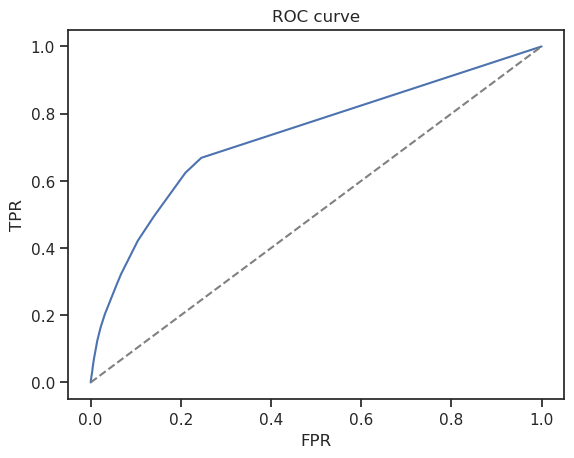

In [114]:
plt.clf()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

# K-fold validation strategy
K-fold CV is a resampling procedure frequently used to evaluate ML models with a limited dataset. The parameter k indicates the number of partitions in which the dataset is split into, and the modelling process is repeated k times

In [115]:
kf = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)

In [116]:
dt = DecisionTreeClassifier(max_depth=8, random_state=42)
scores = model_selection.cross_val_score(dt, dev_df_X, dev_df_y, cv=kf)

In [117]:
scores

array([0.91296644, 0.9111945 , 0.91406087, 0.91374818, 0.91802168,
       0.91635397, 0.91395664, 0.91353521, 0.91713139, 0.91624537])

In [118]:
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.915 (+/- 0.004)


# ENSEMBLE MODELS

In [119]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [120]:
rf = RandomForestClassifier(n_estimators=3, max_depth=5, random_state=42)

In [121]:
rf.fit(
    X=X_train,
    y=np.ravel(y_train)
)

RandomForestClassifier(max_depth=5, n_estimators=3, random_state=42)

In [122]:
tree_list = rf.estimators_

In [123]:
tree_list

[DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=1608637542),
 DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=1273642419),
 DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=1935803228)]

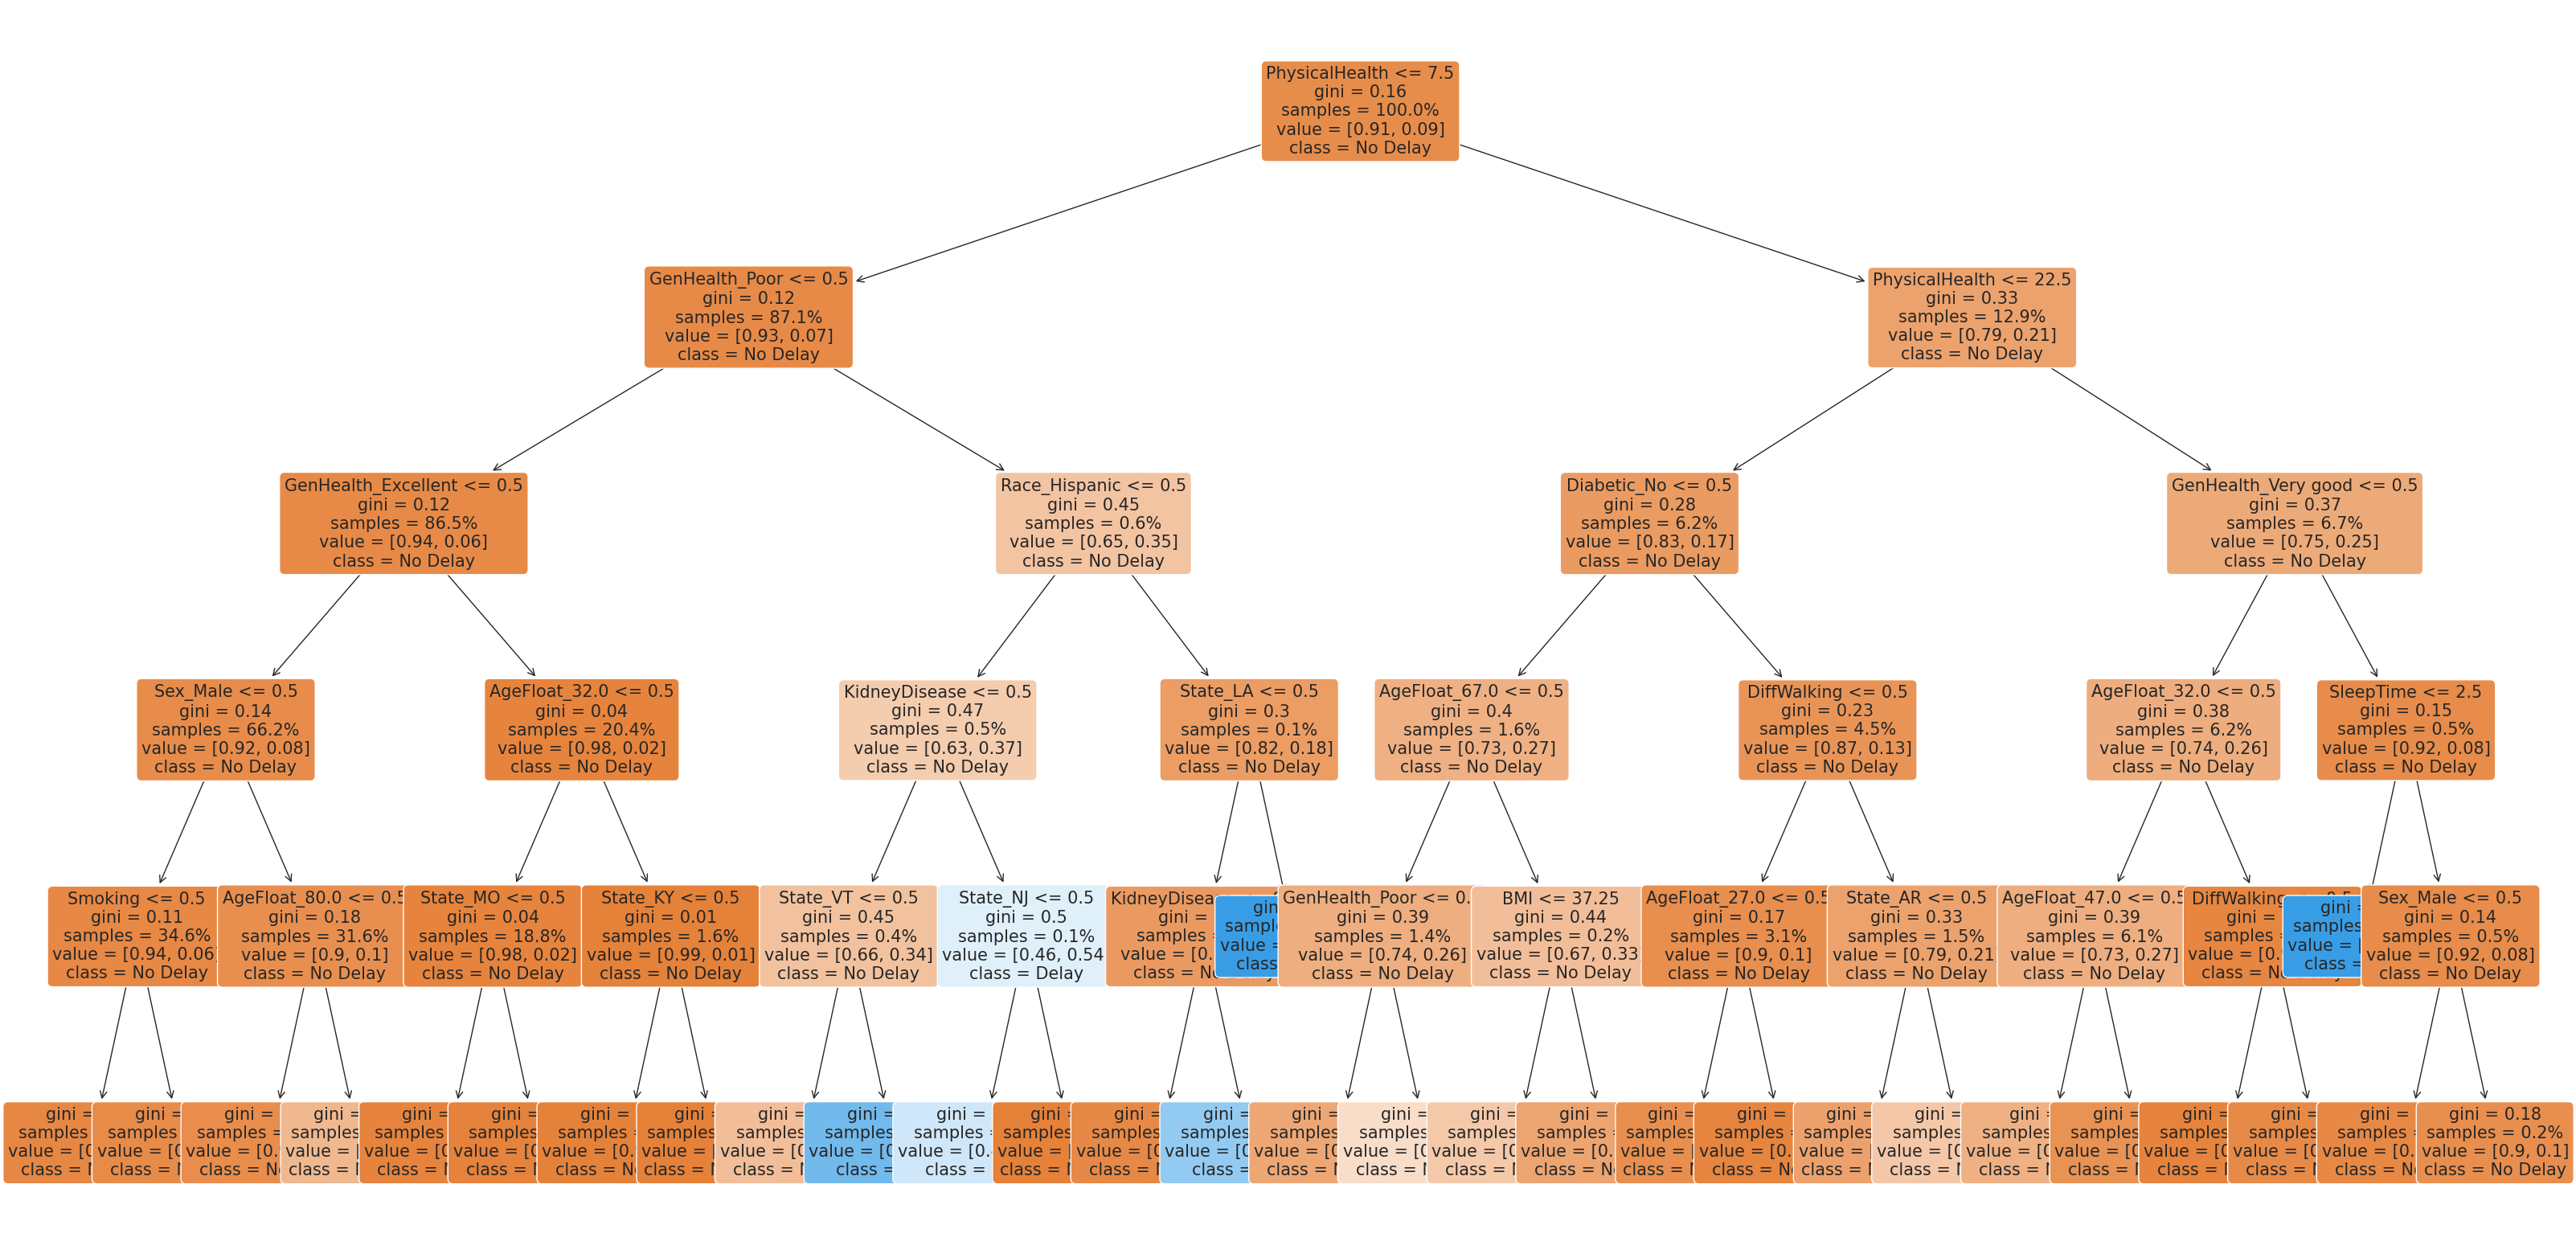

In [124]:
fig, ax = plt.subplots(figsize=(40,20))
tree.plot_tree(tree_list[0],
               ax = ax,
               fontsize = 15,
               proportion=True,
               filled = True,
               impurity=True,
                rounded = True,
               precision = 2,

               class_names = ['No Delay', 'Delay'],
               feature_names = X_test.columns);

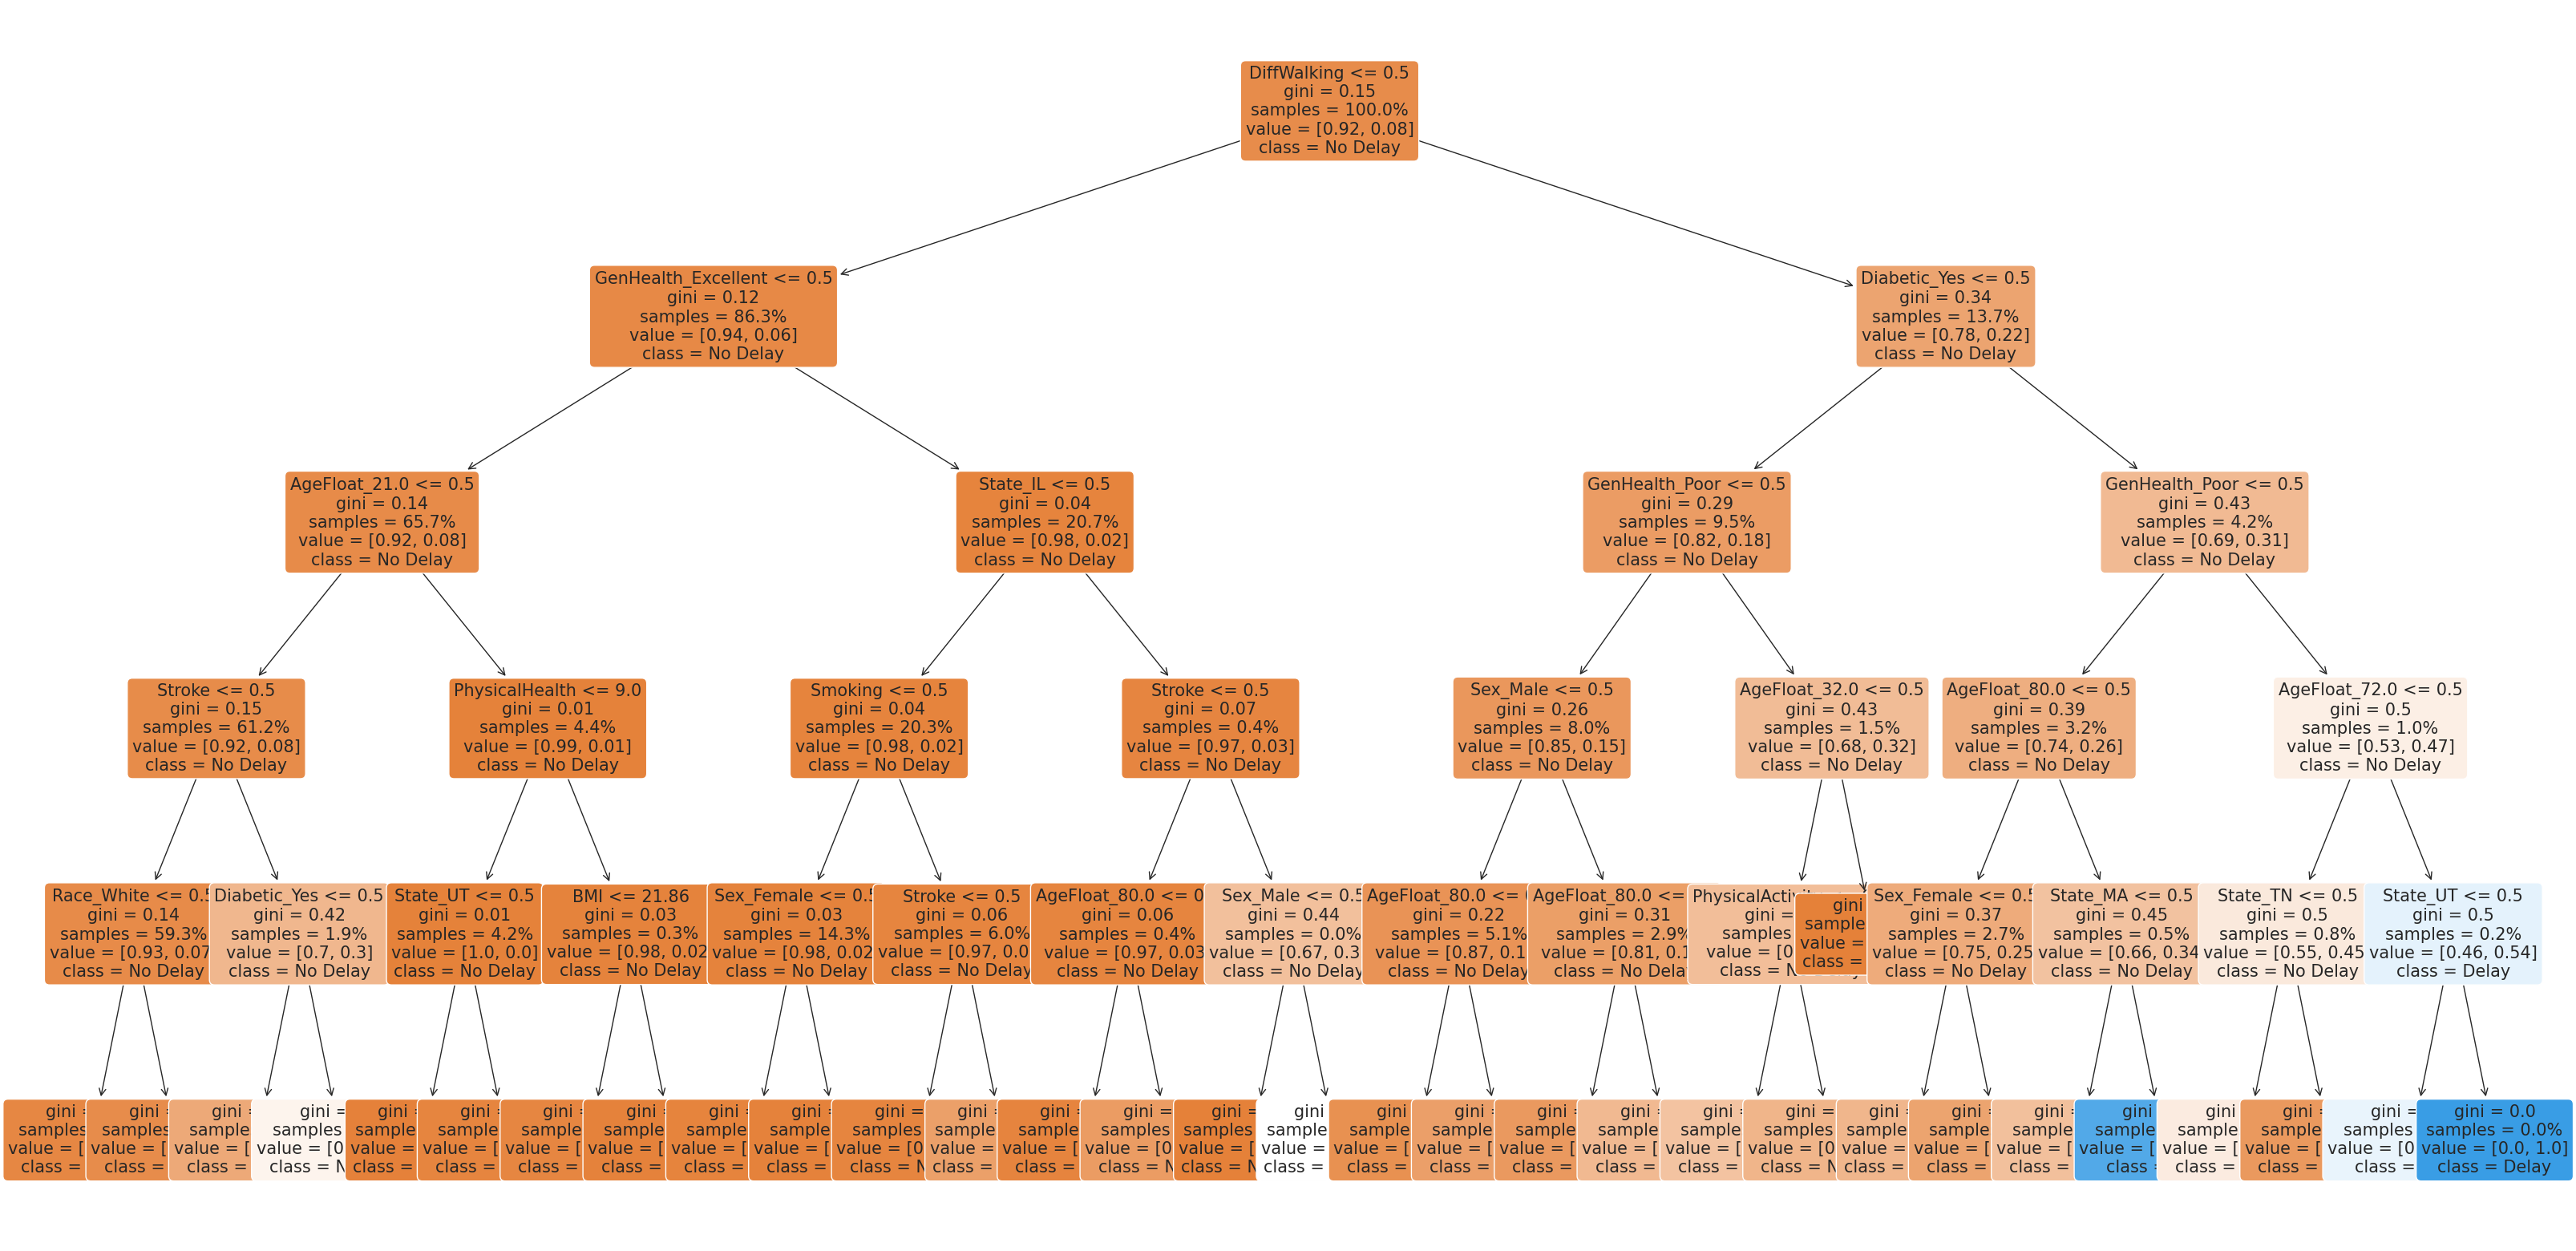

In [125]:
fig, ax = plt.subplots(figsize=(40,20))
tree.plot_tree(tree_list[2],
               ax = ax,
               fontsize = 15,
               proportion=True,
               filled = True,
               impurity=True,
                rounded = True,
               precision = 2,

               class_names = ['No Delay', 'Delay'],
               feature_names = X_test.columns);

In [126]:
top_features = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(20)

In [127]:
top_features

DiffWalking           0.24
PhysicalHealth        0.23
GenHealth_Poor        0.08
Diabetic_Yes          0.08
AgeFloat_80.0         0.06
GenHealth_Excellent   0.06
Stroke                0.05
AgeFloat_21.0         0.04
Sex_Female            0.03
Sex_Male              0.03
Diabetic_No           0.02
AgeFloat_37.0         0.02
AgeFloat_27.0         0.01
GenHealth_Very good   0.01
AgeFloat_32.0         0.01
Race_White            0.01
Smoking               0.01
AgeFloat_47.0         0.00
KidneyDisease         0.00
PhysicalActivity      0.00
dtype: float64

<AxesSubplot:>

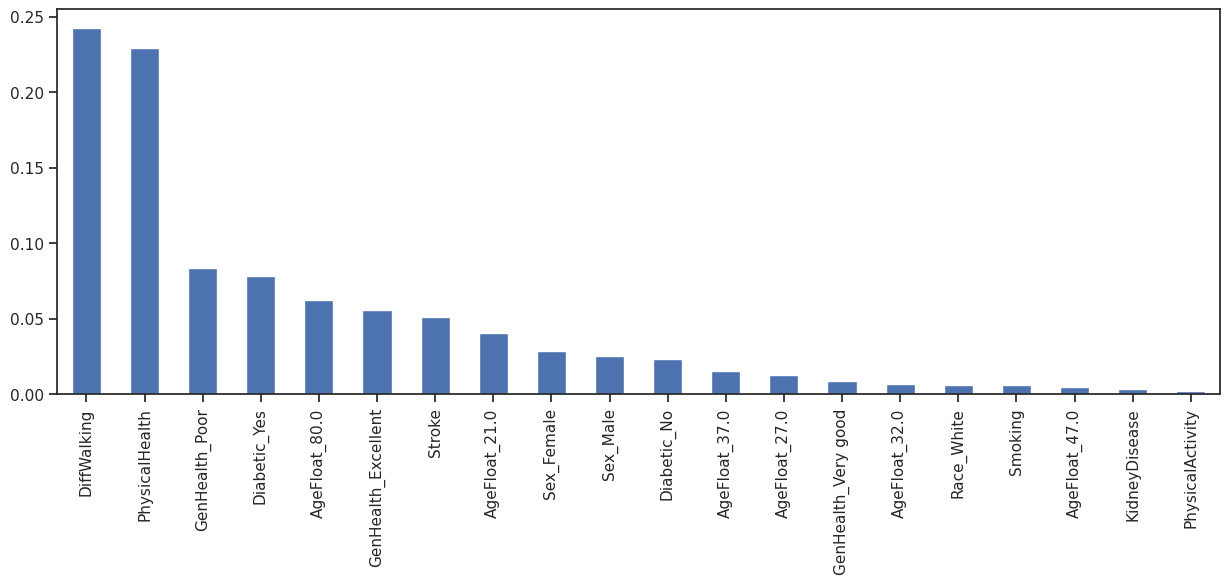

In [128]:
plt.figure(figsize=(15,5))
top_features.plot(kind='bar')

In [129]:
rf = RandomForestClassifier(n_estimators=100, max_depth=8, min_samples_split=500, random_state=42)
rf.fit(X_train, np.ravel(y_train))

RandomForestClassifier(max_depth=8, min_samples_split=500, random_state=42)

In [130]:
y_score = pd.DataFrame(rf.predict_proba(X_test)[:,1], index=y_test.index, columns=['DelayScore'])

In [131]:
results_df = y_test.join(y_score)

In [132]:
results_df.head(10)

,HeartDisease,DelayScore
312785,0,0.06
264181,0,0.05
71814,0,0.02
226164,0,0.08
318604,0,0.03
228467,0,0.05
139381,0,0.03
84277,0,0.02
177909,0,0.06
286800,0,0.06


In [133]:
print(metrics.roc_auc_score(results_df['HeartDisease'], results_df['DelayScore']))

0.8268984109498047


In [134]:
fpr, tpr, _ = metrics.roc_curve(results_df['HeartDisease'], results_df['DelayScore'])

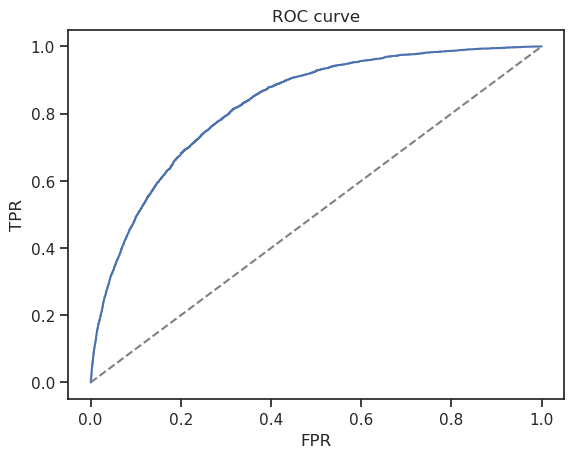

In [135]:
plt.clf()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

Gradient Boosting Classifier

In [136]:
gb = GradientBoostingClassifier(n_estimators=50, max_depth=5, min_samples_split=500, random_state=42)
gb.fit(X_train, np.ravel(y_train))

GradientBoostingClassifier(max_depth=5, min_samples_split=500, n_estimators=50,
                           random_state=42)

In [137]:
y_score = pd.DataFrame(gb.predict_proba(X_test)[:,1], index=y_test.index, columns=['DelayScore'])

In [138]:
results_df = y_test.join(y_score)

In [139]:
print(metrics.roc_auc_score(results_df['HeartDisease'], results_df['DelayScore']))

0.8410039074221114


In [140]:
fpr, tpr, _ = metrics.roc_curve(results_df['HeartDisease'], results_df['DelayScore'])

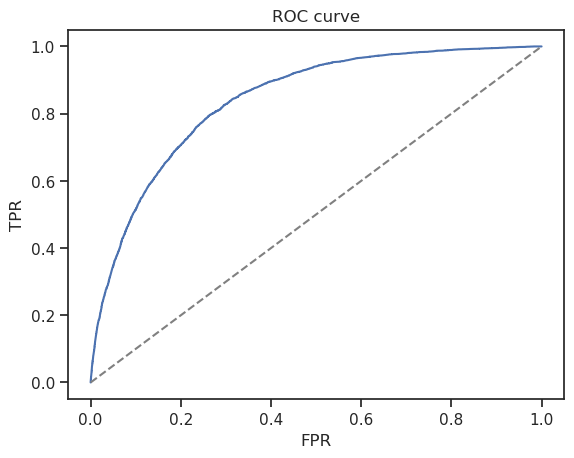

In [141]:
plt.clf()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

# FINAL MODEL COMPARISON
(Decison Tree vs Random Forest vs Gradient Boosting)

In [142]:
RANDOM_STATE = 42
n_estimators = 50
max_depth = 5

models = [
    ('DecisionTree', DecisionTreeClassifier(max_depth=max_depth, random_state=42)),
    ('RandomForest', RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=RANDOM_STATE)),
    ('GradientBoosting', GradientBoostingClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=RANDOM_STATE))
]

ROC AUC Score for DecisionTree: 0.7534584425838715
ROC AUC Score for RandomForest: 0.820737643292242
ROC AUC Score for GradientBoosting: 0.8410103317158828


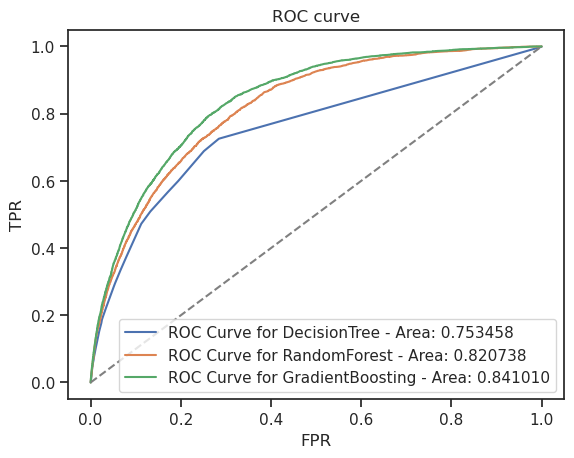

In [143]:
plt.clf()
for model in models:
    model_name = model[0]
    model_instance = model[1]
    model_instance.fit(X_train, np.ravel(y_train))
    predictions = model_instance.predict_proba(X_test)[:,1]
    auc_score = metrics.roc_auc_score(y_test, predictions)
    print('ROC AUC Score for {}: {}'.format(model_name, auc_score))
    fpr, tpr, _ = metrics.roc_curve(y_test, predictions)
    plt.plot(fpr, tpr, label='ROC Curve for {} - Area: {:2f}'.format(model_name, auc_score))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.title('ROC curve')
plt.show()

# HTML

In [144]:
import plotly.graph_objects as go

In [145]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["HeartDisease", "BMI", "DiffWalking", "Sex"],
      color = "blue"
    ),
    link = dict(
      source = [0, 1, 0], 
      target = [2, 3, 3],
      value = [8, 4, 2]
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
plotly.offline.plot(fig, auto_open=False, filename=f"sankey.html")

NameError: name 'plotly' is not defined

In [ ]:
# Bubble

fig = px.scatter(df.query("HeartDisease==1"), x="BMI", y="PhysicalHealth",
	         size="BMI", color="BMI",
                 hover_name="HeartDisease", size_max=60)

fig.update_layout(title="Relação HeartDisease X BMI X PhysicalHealth")

plotly.offline.plot(fig, auto_open=False, filename=f"bubble.html")